In [24]:
import pandas as pd
import glob
import os

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## uncomplete_id_code split

In [99]:
uncomplete_id_code = pd.read_csv("./data/uncomplete_id_code.csv")
for i in range(len(uncomplete_id_code)):
    if i%50==0:
        tmp = uncomplete_id_code.iloc[i:i+50, :]
        tmp.to_csv(f"./data/split_id_code/id_code_{i}.csv", index=False)

## 완료 url 옮기기

In [14]:
complete_list = [i.split("_")[-1][:-4] for i in glob.glob("./result_tmp/*")]

In [16]:
len(complete_list)

869

In [12]:
complete_list = [i.split("_")[-1][:-4] for i in glob.glob("./result/*")]
url_list = [i for i in glob.glob("./data/new_url/*.csv")]

for url in url_list:
    if url.split("_")[-1][:-4] in complete_list:
        os.rename(url, './data/new_url/완료/'+url.split("\\")[-1])
        
complete_list = [i.split("_")[-1][:-4] for i in glob.glob("./result/*")]

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './data/new_url\\00000012_얼라인드.csv' -> './data/new_url/완료/00000012_얼라인드.csv'

In [13]:
len(complete_list)

96

## 크롤링 완료 안 된 기업 목록

In [93]:
id_code = pd.read_csv("./data/id_code.csv")
uncomplete_id_code = id_code.copy()
for name in complete_list:
    uncomplete_id_code.drop(uncomplete_id_code[uncomplete_id_code['name']==name].index, inplace=True)
uncomplete_id_code.to_csv("./data/uncomplete_id_code.csv", index=False)

## 파이차트     

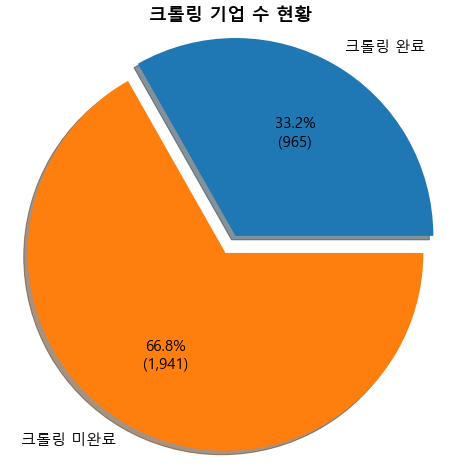

In [17]:
# complete = len(complete_list)
complete = 965
labels = ['크롤링 완료', '크롤링 미완료']
sizes = [complete, 2906-complete]
explode = (0, 0.1)

def absolute_value(val, sizes):
    absolute = int(np.round(val/100.*np.sum(sizes)))
    return f"{val:.1f}%\n({absolute:,})"


plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct=lambda pct:absolute_value(pct, sizes), shadow=True, textprops={'fontsize': 15})
plt.title("크롤링 기업 수 현황", fontdict={"fontsize":18, "weight":"bold"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 전체 기사 수

In [40]:
total = pd.DataFrame()
all_url = glob.glob("./data/crawling_*.csv")
for url in all_url:
    tmp_df = pd.read_csv(url)
    total = pd.concat([total, tmp_df])
    total = total.drop_duplicates(subset=['name', 'url'])
total.to_csv("./data/total_crawling_list.csv", index=False)
print(len(total))

17080221


### 크롤링 완료 기사 수

In [25]:
news_complete = glob.glob("./result/*")
total_news = pd.DataFrame()
complete = 0
for news in news_complete:
    tmp_df = pd.read_csv(news)
    total_news = pd.concat([total_news, tmp_df])
    total_news = total_news.drop_duplicates(subset=['name', 'url'])
    complete += len(tmp_df)
print(complete)

60790


In [26]:
# total = 19958081
# complete = 508091

total = 3991616
complete = 60790

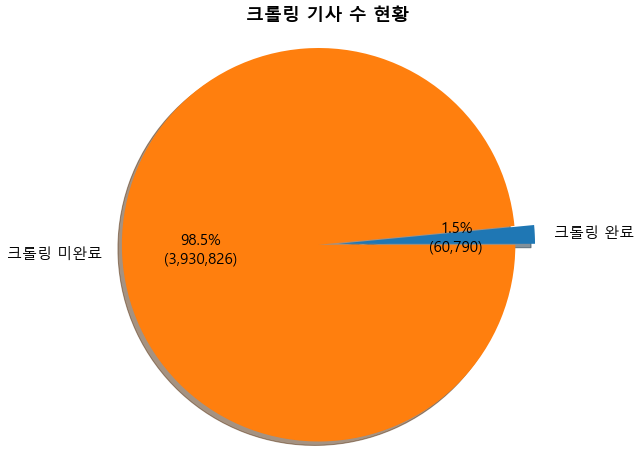

In [27]:
labels = ['크롤링 완료', '크롤링 미완료']
# sizes = [(complete/len(total))*100, ((len(total)-complete)/len(total))*100]
sizes = np.array([complete, (total-complete)])

explode = (0, 0.1)


def absolute_value(val, sizes):
    absolute = int(np.round(val/100.*np.sum(sizes)))
    return f"{val:.1f}%\n({absolute:,})"

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct=lambda pct:absolute_value(pct, sizes), shadow=True, textprops={'fontsize': 15})
plt.title("크롤링 기사 수 현황", fontdict={"fontsize":18, "weight":"bold"})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()